# Fighting Fire with Data - Starter Notebook

This notebook should help you get started with the 'Fighting Fire with Data' hackathon on Zindi. In it we cover:
- Loading the data
- Simple EDA and an example of feature enginnering
- Suggestions for validation split
- Creating a simple model
- Making a submission
- Some tips for improving your score


# Setup

Make sure the files are available in the current directory. On Colab, upload them using the files tab on the left.

In [26]:
!ls *.csv # List files to check train, ss and test are present

'ls' is not recognized as an internal or external command,
operable program or batch file.


In [27]:
import pandas as pd
from sklearn.linear_model import RidgeCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from matplotlib import pyplot as plt

In [28]:
# The training data.
var_defs = pd.read_csv("https://raw.githubusercontent.com/GKamundia/Zindi/main/Wildfire%20Prediction%20Challenge/variable_definitions.csv")
var_defs  

,Variable,Description
0,ID,The IDs take the form of [area ID]_yyyy-mm-dd....
1,area,Area ID
2,date,The date that the data is aggregated over
3,lat,Latitude of the center of the area
4,lon,Longitude of the center of the area
5,burn_area,Percentage of the area burnt
6,climate_aet,"Actual evapotranspiration, derived using a one..."
7,climate_def,"Climate water deficit, derived using a one-dim..."
8,climate_pdsi,Palmer Drought Severity Index
9,climate_pet,Reference evapotranspiration (ASCE Penman-Mont...


In [29]:
# The training data.
train = pd.read_csv('https://raw.githubusercontent.com/GKamundia/Zindi/main/Wildfire%20Prediction%20Challenge/Train.csv')
train.head()

,ID,lat,lon,burn_area,climate_aet,climate_def,climate_pdsi,climate_pet,climate_pr,climate_ro,...,landcover_0,landcover_1,landcover_2,landcover_3,landcover_4,landcover_5,landcover_6,landcover_7,landcover_8,precipitation
0,0_2001-01-01,-15.858835,29.237029,0.0,1195,0,263,1195,206,10,...,0.0,0.0,0.018654,0.0,0.714446,0.012174,0.244890,0.009836,0.0,0.256932
1,1_2001-01-01,-15.858835,29.487029,0.0,1196,0,232,1196,201,10,...,0.0,0.0,0.000000,0.0,0.654783,0.000095,0.345121,0.000000,0.0,0.273093
2,2_2001-01-01,-15.858835,29.737029,0.0,1190,0,314,1190,192,10,...,0.0,0.0,0.000000,0.0,0.516421,0.000000,0.483579,0.000000,0.0,0.285109
3,3_2001-01-01,-15.858835,29.987029,0.0,1144,0,321,1144,186,66,...,0.0,0.0,0.000000,0.0,0.299000,0.163902,0.537098,0.000000,0.0,0.298418
4,4_2001-01-01,-15.858835,30.237029,0.0,1187,0,413,1187,186,9,...,0.0,0.0,0.000000,0.0,0.277392,0.067742,0.654866,0.000000,0.0,0.315621


In [30]:
test = pd.read_csv('https://raw.githubusercontent.com/GKamundia/Zindi/main/Wildfire%20Prediction%20Challenge/Test.csv')
test.head(1)

,ID,lat,lon,climate_aet,climate_def,climate_pdsi,climate_pet,climate_pr,climate_ro,climate_soil,...,landcover_0,landcover_1,landcover_2,landcover_3,landcover_4,landcover_5,landcover_6,landcover_7,landcover_8,precipitation
0,0_2014-01-01,-15.858835,29.237029,1146,74,-451,1220,120,6,212,...,0.0,0.000615,0.015418,0.0,0.416704,0.023724,0.530016,0.013524,0.0,0.404243


# EDA + Feature Engineering

In [31]:
# Look at distribution of each variable
train.describe()

,lat,lon,burn_area,climate_aet,climate_def,climate_pdsi,climate_pet,climate_pr,climate_ro,climate_soil,...,landcover_0,landcover_1,landcover_2,landcover_3,landcover_4,landcover_5,landcover_6,landcover_7,landcover_8,precipitation
count,83148.000000,83148.000000,83148.000000,83148.000000,83148.000000,83148.000000,83148.000000,83148.000000,83148.000000,83148.000000,...,83148.000000,83148.000000,83148.000000,8.314800e+04,83148.000000,83148.000000,83148.000000,83148.000000,83148.000000,83148.000000
mean,-19.014557,29.860856,0.007632,484.491124,828.892721,-30.806237,1313.382992,54.576322,6.215134,305.477919,...,0.006158,0.000017,0.008583,4.066313e-08,0.160628,0.037453,0.785382,0.000354,0.001424,0.078551
std,1.588444,1.751090,0.029226,470.467480,546.934469,235.802930,315.209838,71.997561,21.480399,400.956123,...,0.053111,0.000141,0.059046,3.535121e-06,0.192957,0.106050,0.233953,0.001773,0.014233,0.104464
min,-22.358835,25.487029,0.000000,0.000000,0.000000,-563.000000,587.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000019,0.000000,0.000000,0.000000
25%,-20.358835,28.487029,0.000000,50.000000,375.000000,-212.000000,1081.000000,1.000000,0.000000,70.000000,...,0.000000,0.000000,0.000000,0.000000e+00,0.014993,0.000000,0.655322,0.000000,0.000000,0.002017
50%,-18.858835,29.987029,0.000000,302.000000,858.000000,-108.000000,1290.000000,22.000000,1.000000,149.000000,...,0.000000,0.000000,0.000000,0.000000e+00,0.076706,0.000139,0.880600,0.000000,0.000000,0.028503
75%,-17.858835,31.237029,0.000000,931.000000,1211.000000,142.000000,1517.000000,87.000000,4.000000,329.000000,...,0.000000,0.000000,0.000000,0.000000e+00,0.246498,0.015166,0.971209,0.000000,0.000000,0.125500
max,-15.858835,32.987029,0.843886,1713.000000,2614.000000,851.000000,2620.000000,501.000000,342.000000,3319.000000,...,0.828131,0.004918,0.711603,3.073689e-04,0.981472,0.881323,1.000000,0.016708,0.301823,0.801328


<Axes: >

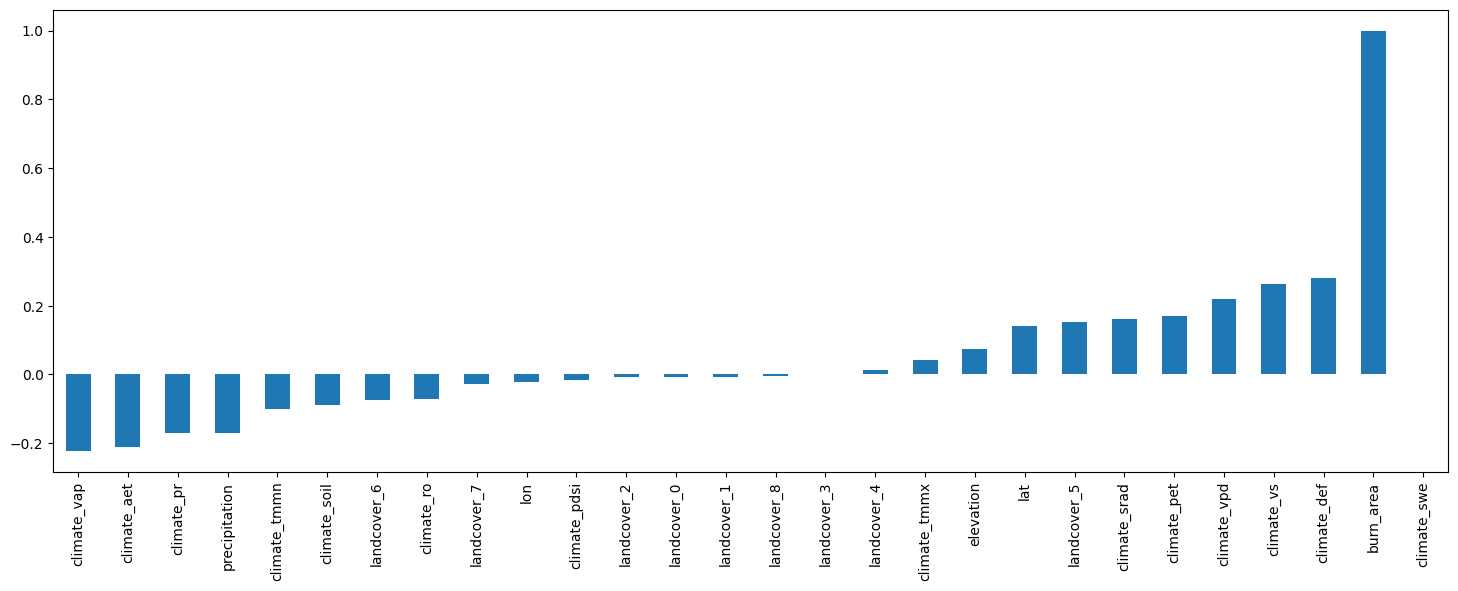

In [32]:
# Look at correlation with target
train.select_dtypes(include=['number']).corr()['burn_area'].sort_values().plot(kind='bar', figsize=(18, 6))

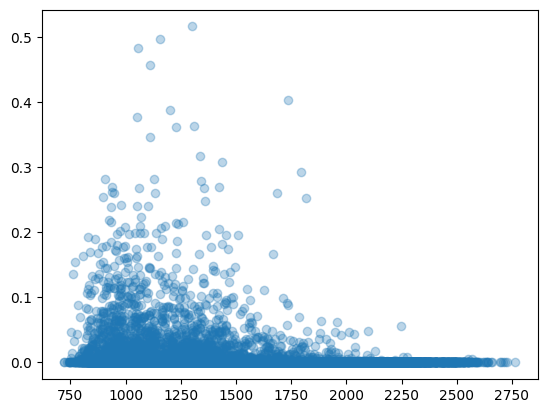

In [33]:
# Look at some scatter plots (only plotting for a subset of data to keep things fast)
sample = train.sample(10000)
plt.scatter(sample['climate_vap'], sample['burn_area'], alpha=0.3)

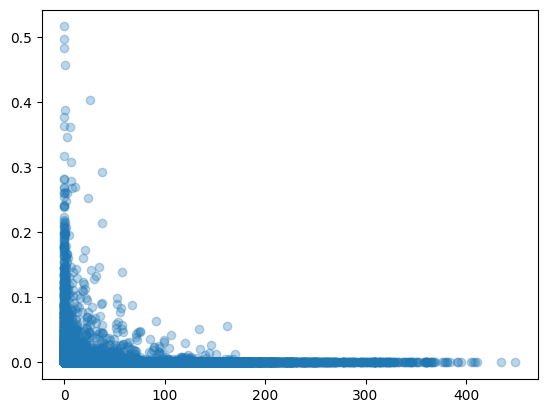

In [34]:
# Most fires occur when there's very little rain.
plt.scatter(sample['climate_pr'], sample['burn_area'], alpha=0.3)

##  Adding date features

In [35]:
# Split the ID (eg 127_2017-01-03) to get the date string, which we convert to datetime to make life easier
train['date'] = pd.to_datetime(train['ID'].apply(lambda x: x.split('_')[1]))
test['date'] = pd.to_datetime(test['ID'].apply(lambda x: x.split('_')[1]))

In [36]:
train['date'][1]

Timestamp('2001-01-01 00:00:00')

In [37]:
train.head()

,ID,lat,lon,burn_area,climate_aet,climate_def,climate_pdsi,climate_pet,climate_pr,climate_ro,...,landcover_1,landcover_2,landcover_3,landcover_4,landcover_5,landcover_6,landcover_7,landcover_8,precipitation,date
0,0_2001-01-01,-15.858835,29.237029,0.0,1195,0,263,1195,206,10,...,0.0,0.018654,0.0,0.714446,0.012174,0.244890,0.009836,0.0,0.256932,2001-01-01
1,1_2001-01-01,-15.858835,29.487029,0.0,1196,0,232,1196,201,10,...,0.0,0.000000,0.0,0.654783,0.000095,0.345121,0.000000,0.0,0.273093,2001-01-01
2,2_2001-01-01,-15.858835,29.737029,0.0,1190,0,314,1190,192,10,...,0.0,0.000000,0.0,0.516421,0.000000,0.483579,0.000000,0.0,0.285109,2001-01-01
3,3_2001-01-01,-15.858835,29.987029,0.0,1144,0,321,1144,186,66,...,0.0,0.000000,0.0,0.299000,0.163902,0.537098,0.000000,0.0,0.298418,2001-01-01
4,4_2001-01-01,-15.858835,30.237029,0.0,1187,0,413,1187,186,9,...,0.0,0.000000,0.0,0.277392,0.067742,0.654866,0.000000,0.0,0.315621,2001-01-01


In [38]:
# Date variables
train['month'] = train.date.dt.month
train['year'] = train.date.dt.year

In [39]:
# Group by month and calculate the mean burn_area
monthly_mean_burn_area = train.groupby('month')['burn_area'].mean().reset_index()

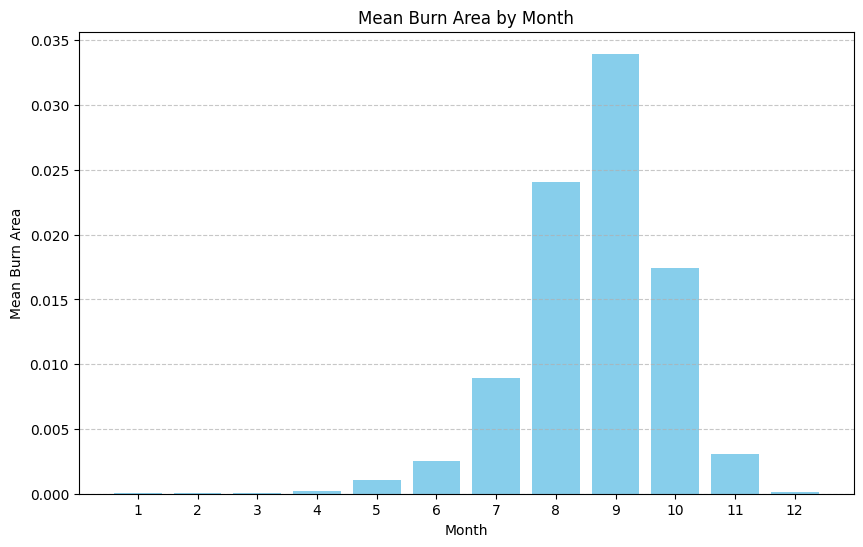

In [40]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.bar(monthly_mean_burn_area['month'], monthly_mean_burn_area['burn_area'], color='skyblue')
plt.xlabel('Month')
plt.ylabel('Mean Burn Area')
plt.title('Mean Burn Area by Month')
plt.xticks(monthly_mean_burn_area['month'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [41]:
# Group by year and calculate the mean burn_area
yearly_mean_burn_area = train.groupby('year')['burn_area'].mean().reset_index()

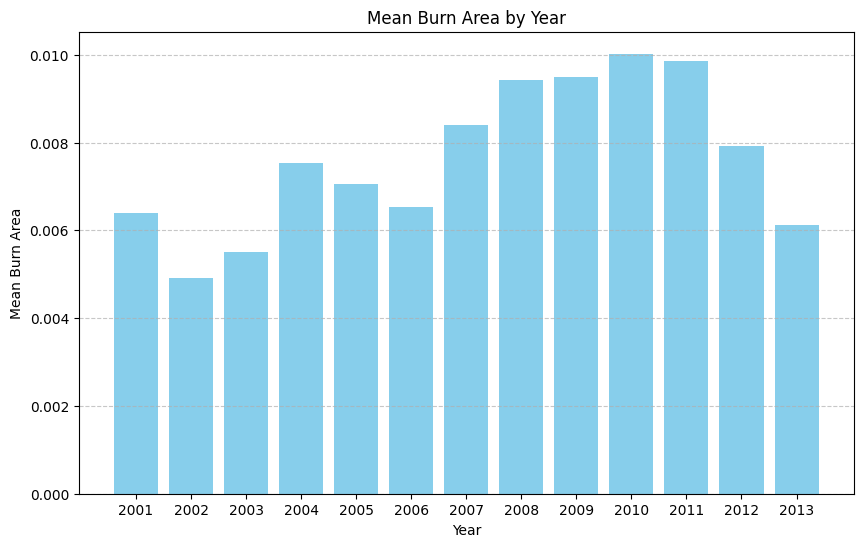

In [42]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.bar(yearly_mean_burn_area['year'], yearly_mean_burn_area['burn_area'], color='skyblue')
plt.xlabel('Year')
plt.ylabel('Mean Burn Area')
plt.title('Mean Burn Area by Year')
plt.xticks(yearly_mean_burn_area['year'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<Axes: xlabel='date'>

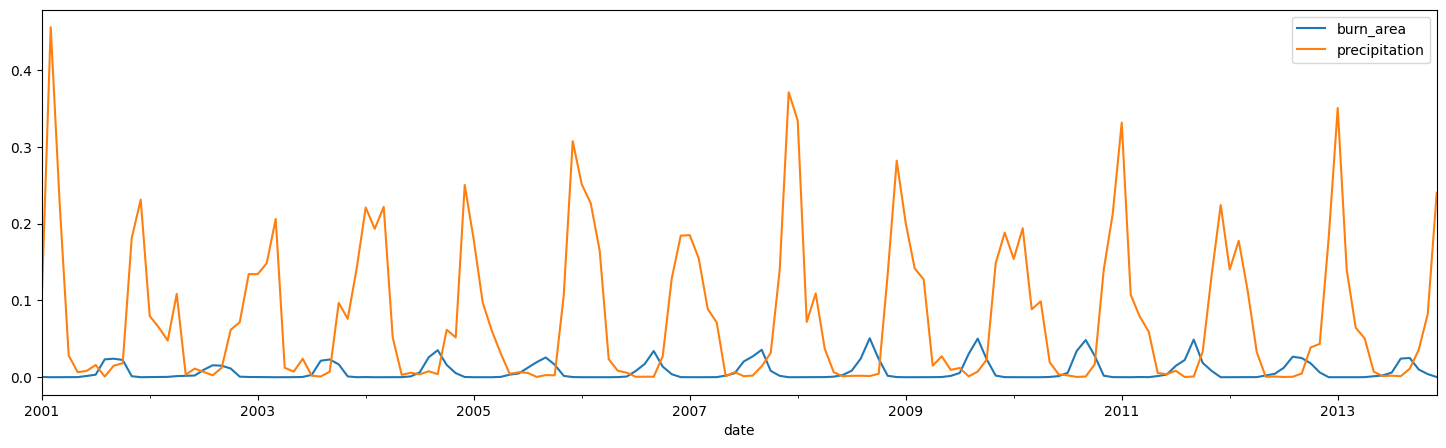

In [43]:
# Convert 'burn_area' to numeric, handling non-numeric values
train['burn_area'] = pd.to_numeric(train['burn_area'], errors='coerce')

# Now try plotting again
ax = train.groupby('date')['burn_area'].mean().reset_index().plot(y='burn_area', x='date', figsize=(18, 5))
train.groupby('date')['precipitation'].mean().reset_index().plot(y='precipitation', x='date', ax=ax)

## Adding more features - some ideas




*   Read the list of climate variables and what they mean. See if you can combine them in interesting ways - perhaps a 'hot_and_dry' metric...
*   Fire depends on some processes that take a long time - for example, there may be more fuel if the previous growing season was a good one. Consider some lagged variables to give the model some inputs for what came before the current month.
*   Make some categorical features - 'dominant_land_type' or 'is_peak_rainfall'.
*   ...



# Data Split for Validation

We don't want to just split randomly - this would give us artificially high scores. Instead, let's use the last 3 years of the dataset for validation to more closely match the test configuration.

In [44]:
"""train_all = train.copy().dropna()
train = train_all.loc[train_all.date < '2011-01-01']
valid = train_all.loc[train_all.date > '2011-01-01']
print(train.shape, valid.shape)"""

"train_all = train.copy().dropna()\ntrain = train_all.loc[train_all.date < '2011-01-01']\nvalid = train_all.loc[train_all.date > '2011-01-01']\nprint(train.shape, valid.shape)"

# Simple Model

In [45]:
train.columns

Index(['ID', 'lat', 'lon', 'burn_area', 'climate_aet', 'climate_def',
       'climate_pdsi', 'climate_pet', 'climate_pr', 'climate_ro',
       'climate_soil', 'climate_srad', 'climate_swe', 'climate_tmmn',
       'climate_tmmx', 'climate_vap', 'climate_vpd', 'climate_vs', 'elevation',
       'landcover_0', 'landcover_1', 'landcover_2', 'landcover_3',
       'landcover_4', 'landcover_5', 'landcover_6', 'landcover_7',
       'landcover_8', 'precipitation', 'date', 'month', 'year'],
      dtype='object')

In [46]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83148 entries, 0 to 83147
Data columns (total 32 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   ID             83148 non-null  object        
 1   lat            83148 non-null  float64       
 2   lon            83148 non-null  float64       
 3   burn_area      83148 non-null  float64       
 4   climate_aet    83148 non-null  int64         
 5   climate_def    83148 non-null  int64         
 6   climate_pdsi   83148 non-null  int64         
 7   climate_pet    83148 non-null  int64         
 8   climate_pr     83148 non-null  int64         
 9   climate_ro     83148 non-null  int64         
 10  climate_soil   83148 non-null  int64         
 11  climate_srad   83148 non-null  int64         
 12  climate_swe    83148 non-null  int64         
 13  climate_tmmn   83148 non-null  int64         
 14  climate_tmmx   83148 non-null  int64         
 15  climate_vap    8314

## Feature engineering

In [47]:
train.loc[:, 'date'] = pd.to_datetime(train['ID'].apply(lambda x: x.split('_')[1]))
train.loc[:, 'month'] = train.date.dt.month
train.loc[:, 'year'] = train.date.dt.year
train.loc[:, 'area_ID'] = train['ID'].apply(lambda x: int(x.split('_')[0]))
train.loc[:, 'area_ID'] = train['area_ID'].astype('category')

# Split the ID (eg 127_2017-01-03) to get the date string, which we convert to datetime to make life easier
train['date'] = pd.to_datetime(train['ID'].apply(lambda x: x.split('_')[1]))
test['date'] = pd.to_datetime(test['ID'].apply(lambda x: x.split('_')[1]))
# Date variables
train['month'] = train.date.dt.month
train['year'] = train.date.dt.year

# Extract area_ID from ID
train['area_ID'] = train['ID'].apply(lambda x: int(x.split('_')[0]))
test['area_ID'] = test['ID'].apply(lambda x: int(x.split('_')[0]))

# Convert area_ID to categorical
train['area_ID'] = train['area_ID'].astype('category')
test['area_ID'] = test['area_ID'].astype('category')

# Apply one-hot encoding to area_ID
train = pd.get_dummies(train, columns=['area_ID'], prefix=['area_ID'])
test = pd.get_dummies(test, columns=['area_ID'], prefix=['area_ID'])

# Ensure train and test have the same columns
all_columns = set(train.columns).union(set(test.columns))
train = train.reindex(columns=all_columns, fill_value=0)
test = test.reindex(columns=all_columns, fill_value=0)

In [48]:
# Create combined climate variables
train['hot_and_dry'] = (train['climate_tmmx'] - train['climate_tmmn']) / (train['climate_pr'] + 1)
test['hot_and_dry'] = (test['climate_tmmx'] - test['climate_tmmn']) / (test['climate_pr'] + 1)

train['moisture_stress'] = train['climate_aet'] / (train['climate_pr'] + train['climate_soil'] + 1)
test['moisture_stress'] = test['climate_aet'] / (test['climate_pr'] + test['climate_soil'] + 1)

train['temperature_range'] = train['climate_tmmx'] - train['climate_tmmn']
test['temperature_range'] = test['climate_tmmx'] - test['climate_tmmn']

train['drought_index'] = train['climate_pdsi'] + train['climate_def']
test['drought_index'] = test['climate_pdsi'] + test['climate_def']

train['vpd_temp_ratio'] = train['climate_vpd'] / (train['climate_tmmx'] + 1)
test['vpd_temp_ratio'] = test['climate_vpd'] / (test['climate_tmmx'] + 1)

train['temp_precip_interaction'] = (train['climate_tmmx'] - train['climate_tmmn']) * train['climate_pr']
test['temp_precip_interaction'] = (test['climate_tmmx'] - test['climate_tmmn']) * test['climate_pr']

train['vpd_moisture_interaction'] = train['vpd_temp_ratio'] * train['moisture_stress']
test['vpd_moisture_interaction'] = test['vpd_temp_ratio'] * test['moisture_stress']

# Geographic Regions
# Define latitude and longitude zones based on the specific ranges
train['lat_zone'] = pd.cut(train['lat'], bins=[-26, -22, -18, -16], labels=['Southernmost', 'Mid-Southern', 'Northernmost'])
test['lat_zone'] = pd.cut(test['lat'], bins=[-26, -22, -18, -16], labels=['Southernmost', 'Mid-Southern', 'Northernmost'])

train['lon_zone'] = pd.cut(train['lon'], bins=[26, 29, 31, 33], labels=['Westernmost', 'Mid-Western', 'Easternmost'])
test['lon_zone'] = pd.cut(test['lon'], bins=[26, 29, 31, 33], labels=['Westernmost', 'Mid-Western', 'Easternmost'])

# One-hot encoding geographic regions
train = pd.get_dummies(train, columns=['lat_zone', 'lon_zone'], drop_first=True)
test = pd.get_dummies(test, columns=['lat_zone', 'lon_zone'], drop_first=True)

# Combine climate temperature range with land cover types
for i in range(9):
    train[f'temp_range_landcover_{i}'] = train['temperature_range'] * train[f'landcover_{i}']
    test[f'temp_range_landcover_{i}'] = test['temperature_range'] * test[f'landcover_{i}']

# Combine precipitation with land cover types
for i in range(9):
    train[f'precipitation_landcover_{i}'] = train['precipitation'] * train[f'landcover_{i}']
    test[f'precipitation_landcover_{i}'] = test['precipitation'] * test[f'landcover_{i}']

# Variables to lag
lag_vars = ['climate_pr', 'climate_tmmx', 'climate_tmmn', 'climate_soil', 'climate_aet', 'drought_index']

# Create lagged variables
for var in lag_vars:
    for lag in [3, 6, 9, 12]:
        train[f'{var}_lag_{lag}'] = train[var].shift(lag)
        test[f'{var}_lag_{lag}'] = test[var].shift(lag)

# Dropping NaNs that result from lagging
train = train.dropna().reset_index(drop=True)
test = test.dropna().reset_index(drop=True)

## Data Split

In [49]:
# Use the last 3 years of the dataset for validation
train_all = train.copy().dropna()
train = train_all.loc[train_all.date < '2011-01-01']
valid = train_all.loc[train_all.date >= '2011-01-01']
print(train.shape, valid.shape)

# Define input and output columns
drop_cols = ['ID', 'date', 'burn_area', 'month', 'year', 'landcover_0', 'landcover_1', 'landcover_3', 'landcover_7', 'landcover_8', 'climate_swe', 'climate_ro']
in_cols = [col for col in train.columns if col not in drop_cols]
target_col = 'burn_area'

X_train = train[in_cols]
y_train = train[target_col]
X_valid = valid[in_cols]
y_valid = valid[target_col]

(63948, 618) (19188, 618)


XGBOOST MODEL

In [50]:
# Get our X and y training and validation sets ready
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor

#standardscaler
# scaler=StandardScaler()
# X_train_scaled=scaler.fit_transform(X_train)
# X_valid_scaled=scaler.transform(X_valid)


#Train the XGBClassifier model
xgb=XGBRegressor()

xgb_param_grid = {
    'learning_rate': [0.01, 0.05],
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'subsample': [0.5, 0.6]
}


grid_search=GridSearchCV(
    estimator=xgb,
    param_grid=xgb_param_grid,
    cv=3,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=2
)

# Fit GridSearchCV
grid_search.fit(X_train,y_train)

# Get the best estimator
best_xgb_model=grid_search.best_estimator_

# Create and fit the model
model = best_xgb_model
model.fit(X_train, y_train)

# Make predictions
preds = model.predict(X_valid)

# Score
mean_squared_error(y_valid, preds)**0.5 # RMSE - should match Zindi score. Lower is better

ModuleNotFoundError: No module named 'xgboost'

CATBOOST MODEL

In [ ]:
from catboost import CatBoostRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# Initialize CatBoostRegressor
catboost = CatBoostRegressor(verbose=0)

# Define parameter grid for CatBoost
catboost_param_grid = {
    'learning_rate': [0.01, 0.05],
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'subsample': [0.5, 0.6]
}

# Set up GridSearchCV for CatBoost
grid_search = GridSearchCV(
    estimator=catboost,
    param_grid=catboost_param_grid,
    cv=3,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=2
)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best estimator
best_catboost_model = grid_search.best_estimator_

# Create and fit the model
model = best_catboost_model
model.fit(X_train, y_train)

# Make predictions
preds = model.predict(X_valid)

# Score
rmse = mean_squared_error(y_valid, preds) ** 0.5
print(f'Root Mean Squared Error (CatBoost): {rmse}')


Fitting 3 folds for each of 16 candidates, totalling 48 fits
Root Mean Squared Error (CatBoost): 0.022944587486129927


RANDOM FOREST REGRESSOR

In [ ]:
"""from sklearn.ensemble import RandomForestRegressor

# Initialize RandomForestRegressor
rf = RandomForestRegressor()

# Define parameter grid for RandomForest
rf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
}

# Set up GridSearchCV for RandomForest
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=rf_param_grid,
    cv=3,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=2
)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best estimator
best_rf_model = grid_search.best_estimator_

# Create and fit the model
model = best_rf_model
model.fit(X_train, y_train)

# Make predictions
preds = model.predict(X_valid)

# Score
rmse = mean_squared_error(y_valid, preds) ** 0.5
print(f'Root Mean Squared Error (RandomForest): {rmse}')
"""

"from sklearn.ensemble import RandomForestRegressor\n\n# Initialize RandomForestRegressor\nrf = RandomForestRegressor()\n\n# Define parameter grid for RandomForest\nrf_param_grid = {\n    'n_estimators': [100, 200],\n    'max_depth': [10, 20],\n    'min_samples_split': [2, 5],\n    'min_samples_leaf': [1, 2],\n}\n\n# Set up GridSearchCV for RandomForest\ngrid_search = GridSearchCV(\n    estimator=rf,\n    param_grid=rf_param_grid,\n    cv=3,\n    scoring='neg_mean_squared_error',\n    n_jobs=-1,\n    verbose=2\n)\n\n# Fit GridSearchCV\ngrid_search.fit(X_train, y_train)\n\n# Get the best estimator\nbest_rf_model = grid_search.best_estimator_\n\n# Create and fit the model\nmodel = best_rf_model\nmodel.fit(X_train, y_train)\n\n# Make predictions\npreds = model.predict(X_valid)\n\n# Score\nrmse = mean_squared_error(y_valid, preds) ** 0.5\nprint(f'Root Mean Squared Error (RandomForest): {rmse}')\n"

In [ ]:
# Exercise. Try a RandomForestRegressor model. Use n_estimators=10 if the default takes too long to run, and experiment with the max_depth parameter.

## Ensemble Model

In [ ]:
from sklearn.ensemble import VotingRegressor

cb=best_catboost_model
xgb=best_xgb_model

voting_R=VotingRegressor(estimators=[('CatBoost',cb),
                                     ('xgboost',xgb)
                                       ],
                        )

# Create and fit the model
model = voting_R
model.fit(X_train, y_train)

# Make predictions
preds = model.predict(X_valid)

# Score
rmse = mean_squared_error(y_valid, preds) ** 0.5
print(f'Root Mean Squared Error (Voting Regressor): {rmse}')



Root Mean Squared Error (Voting Regressor): 0.022509972391486745


# Making A Submission

Once you've got some features and a model you're happy with, it's time to submit!

In [ ]:
# Look at the sample submission file
ss = pd.read_csv('https://raw.githubusercontent.com/GKamundia/Zindi/main/Wildfire%20Prediction%20Challenge/SampleSubmission.csv')
ss.head()

,ID,burn_area
0,0_2014-01-01,0
1,1_2014-01-01,0
2,2_2014-01-01,0
3,3_2014-01-01,0
4,4_2014-01-01,0


In [ ]:
# And the test data
test.head()

,climate_vpd,area_ID_506,climate_aet,area_ID_475,area_ID_266,area_ID_192,area_ID_21,climate_tmmx,area_ID_451,area_ID_187,...,climate_soil_lag_9,climate_soil_lag_12,climate_aet_lag_3,climate_aet_lag_6,climate_aet_lag_9,climate_aet_lag_12,drought_index_lag_3,drought_index_lag_6,drought_index_lag_9,drought_index_lag_12
0,99,0,949,0,0,0,0,307,0,0,...,78.0,212.0,1061.0,1187.0,969.0,1146.0,-364.0,-428.0,-346.0,-377.0
1,105,0,958,0,0,0,0,313,0,0,...,139.0,330.0,898.0,1201.0,927.0,1118.0,-169.0,-399.0,-235.0,-307.0
2,104,0,971,0,0,0,0,315,0,0,...,466.0,194.0,916.0,1189.0,1222.0,1067.0,-136.0,-445.0,-408.0,-331.0
3,78,0,1171,0,0,0,0,277,0,0,...,536.0,78.0,949.0,1061.0,1187.0,969.0,-236.0,-364.0,-428.0,-346.0
4,68,0,1133,0,0,0,0,265,0,0,...,619.0,139.0,958.0,898.0,1201.0,927.0,-286.0,-169.0,-399.0,-235.0


In [ ]:
# So we need to predict the burn area for each row in test.

# Add the same features to test as we did to train:
test['month'] = test.date.dt.month
test['year'] = test.date.dt.year

# Get predictions
preds = best_xgb_model.predict(test[in_cols].fillna(0)) # fillna(0) here could be improved by examining the missing data and filling more appropriately.

# Add to submission dataframe
ss['burn_area'] = preds

# Depending on your model, you may have some predictions that don't make sense. Let's constrain our predictions to the range (0, 1)
ss['burn_area'] = ss['burn_area'].clip(0, 1)

# View
ss.head()

In [ ]:
# Save ready for submission:
ss.to_csv('Fourth_submission.csv', index=False)

# Tips for improving your score

- Once you've chosen a model, you should re-train it on all the data (including that which you previously held back for validation) to give it the best chance of succeeding
- There is a timeseries component to this challenge. Think about how to use this to improve your accuracy.
- Spend some time on feature engineering. Since no external data is allowed for this challenge, the winning solution will be the one that gets the most out of the data provided.